## Hoja de trabajo 4

Actividades:             
1. Elabore un modelo de regresión lineal utilizando los datos brindados en el dataset.                                    
2. Explique los resultados a los que llega.
3. Muestre el modelo gráficament              e.
4. El experimento debe ser reproducible por lo que debe fijar que los conjuntos de
entrenamiento y prueba sean los mismos siempre que se ejecute el cód              igo.
5. Analice el modelo. Determine si hay colinealidad en las variables, y cuáles son la  que
aportan al modelo, por su valor de significación.
6. Especifique si el modelo se adapta bien a los                datos.
7. Explique si hay sobreajuste (overfitting) o no. En caso de existir sobreajuste, h ga otro
modelo que lo             corrija.
8. Determine la calidad d           el modelo.
9. Utilice el modelo con el conjunto de prueba y determine la eficiencia del alg ritmo para
predecir el precio           del seguro.
10. Discuta sobre la efectividad del modelo. Haga los gráficos que crea que le  ueden ayudar
en            la discusión.
11. Realice una presentacion en Power Point explicando sus resulta os. Debe poner
informacion importante como hemos visto en clases pasadas. Estructura de la data, las
variables, cuales se usarin, cuales no, metricas de precisión e interpr tacion de estas.
Calculadora de...    predicciones, etc

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [6]:
insurance = pd.read_csv('insurance.csv') 

In [7]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
insurance = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'], drop_first=True)

In [16]:
# Definir variables, dependientes e independientes 
x= insurance.drop('charges', axis=1)
y= insurance['charges']

In [21]:
# Diviidir datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.7, random_state=42)

In [22]:
# Escalar los datos
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
# Entrenar un modelo de regresion lineal 
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [25]:
# Evaluar el modelo
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

In [26]:
# Calcular metricas
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

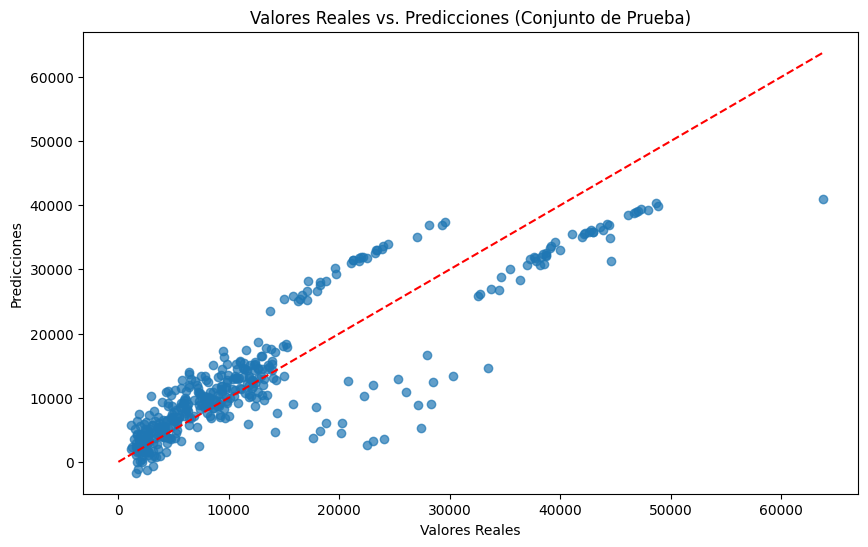

In [27]:
# Graficar valores reales vs predicciones 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title('Valores Reales vs. Predicciones (Conjunto de Prueba)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

In [28]:
# Analizar la cantidad del modelo
print("Métricas de Evaluación del Modelo:")
print("MAE (entrenamiento):", mae_train)
print("MAE (prueba):", mae_test)
print("MSE (entrenamiento):", mse_train)
print("MSE (prueba):", mse_test)
print("R^2 (entrenamiento):", r2_train)
print("R^2 (prueba):", r2_test)

Métricas de Evaluación del Modelo:
MAE (entrenamiento): 4251.255798614485
MAE (prueba): 4145.450555627598
MSE (entrenamiento): 37730549.723577656
MSE (prueba): 33780509.574791655
R^2 (entrenamiento): 0.7423980090600258
R^2 (prueba): 0.769611805436901
